In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [30]:
df = pd.read_csv("midterm_dataset/melb_data.csv")
pd.set_option('display.max_columns', None)
df.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,2.0,1.0,1.0,202.0,NaN,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,2.0,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,3.0,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,3.0,2.0,1.0,94.0,NaN,NaN,Yarra,-37.7969,144.9969,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,3.0,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.8072,144.9941,Northern Metropolitan,4019.0


In [31]:
df.info()
df.describe()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13580 entries, 0 to 13579
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         13580 non-null  object 
 1   Address        13580 non-null  object 
 2   Rooms          13580 non-null  int64  
 3   Type           13580 non-null  object 
 4   Price          13580 non-null  float64
 5   Method         13580 non-null  object 
 6   SellerG        13580 non-null  object 
 7   Date           13580 non-null  object 
 8   Distance       13580 non-null  float64
 9   Postcode       13580 non-null  float64
 10  Bedroom2       13580 non-null  float64
 11  Bathroom       13580 non-null  float64
 12  Car            13518 non-null  float64
 13  Landsize       13580 non-null  float64
 14  BuildingArea   7130 non-null   float64
 15  YearBuilt      8205 non-null   float64
 16  CouncilArea    12211 non-null  object 
 17  Lattitude      13580 non-null  float64
 18  Longti

Suburb              0
Address             0
Rooms               0
Type                0
Price               0
Method              0
SellerG             0
Date                0
Distance            0
Postcode            0
Bedroom2            0
Bathroom            0
Car                62
Landsize            0
BuildingArea     6450
YearBuilt        5375
CouncilArea      1369
Lattitude           0
Longtitude          0
Regionname          0
Propertycount       0
dtype: int64

In [32]:
df_clean = df.drop(columns=[
    'Suburb', 'Address', 'SellerG', 'Date',
    'CouncilArea', 'Regionname', 'Method'
])

df_clean = df_clean.drop(columns=['BuildingArea', 'YearBuilt'])

In [33]:
le = LabelEncoder()
df_clean['Type'] = le.fit_transform(df_clean['Type'])

In [34]:
imputer = SimpleImputer(strategy='mean')
df_imputed = pd.DataFrame(imputer.fit_transform(df_clean), columns=df_clean.columns)

scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df_imputed), columns=df_imputed.columns)

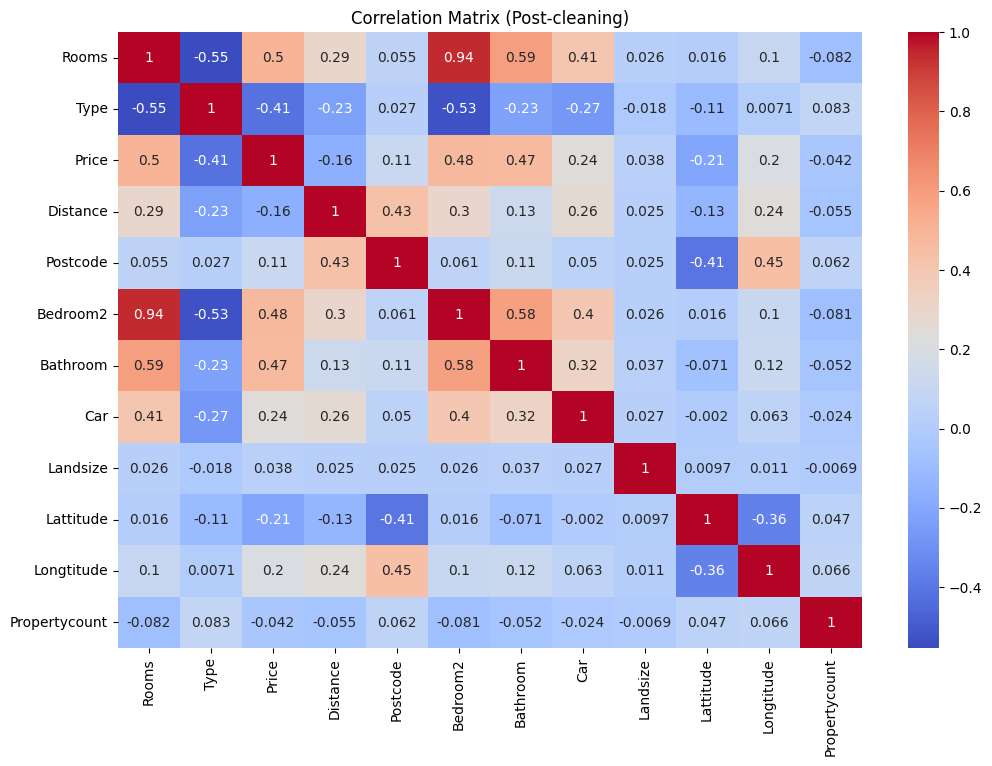

In [35]:
plt.figure(figsize=(12, 8))
sns.heatmap(df_imputed.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix (Post-cleaning)")
plt.show()


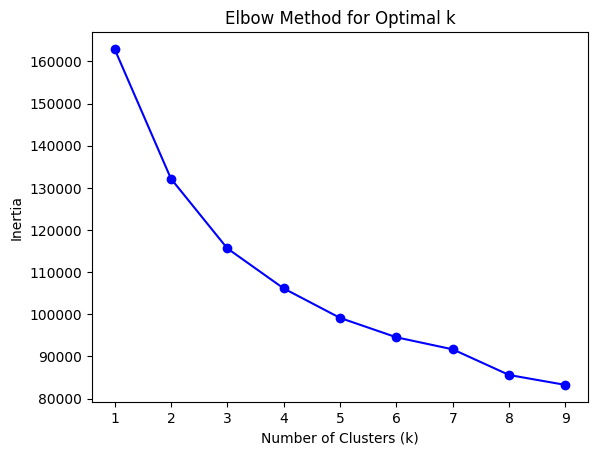

In [36]:
inertia = []
K = range(1, 10)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_scaled)
    inertia.append(kmeans.inertia_)

plt.plot(K, inertia, 'bo-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()

In [37]:
kmeans = KMeans(n_clusters=3, random_state=42)
df_scaled['Cluster'] = kmeans.fit_predict(df_scaled)

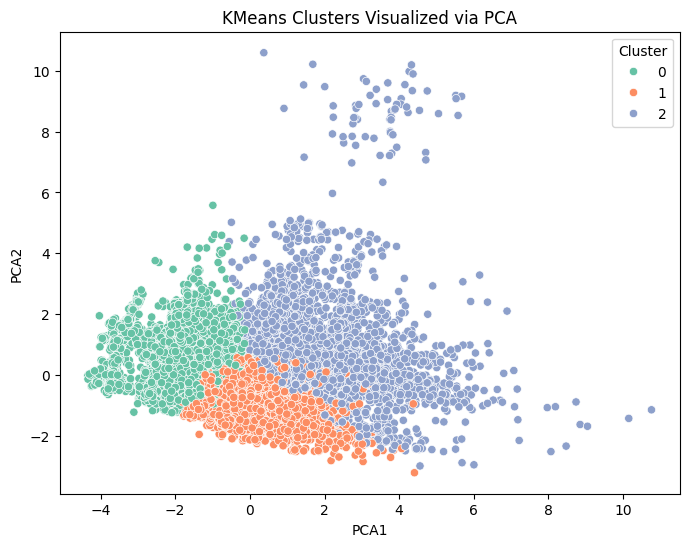

In [38]:
pca = PCA(n_components=2)
pca_proj = pca.fit_transform(df_scaled.drop(columns=['Cluster']))
df_scaled['PCA1'] = pca_proj[:, 0]
df_scaled['PCA2'] = pca_proj[:, 1]

plt.figure(figsize=(8, 6))
sns.scatterplot(x='PCA1', y='PCA2', hue='Cluster', data=df_scaled, palette='Set2')
plt.title("KMeans Clusters Visualized via PCA")
plt.show()

In [39]:
from sklearn.metrics import silhouette_score

X_cluster = df_scaled.drop(columns=['Cluster', 'PCA1', 'PCA2'])

score = silhouette_score(X_cluster, df_scaled['Cluster'])
print(f"Silhouette Score: {score:.3f}")

Silhouette Score: 0.187


In [40]:
df_analyzed = df_imputed.copy()
df_analyzed['Cluster'] = df_scaled['Cluster']

cluster_summary = df_analyzed.groupby('Cluster').mean()
print(cluster_summary)

            Rooms      Type         Price   Distance     Postcode  Bedroom2  \
Cluster                                                                       
0        1.925358  1.499259  6.969924e+05   7.231117  3109.408057  1.916461   
1        3.135145  0.095123  9.512857e+05  10.058302  3057.430194  3.101080   
2        3.667948  0.137194  1.604385e+06  13.066002  3163.099471  3.644642   

         Bathroom       Car    Landsize  Lattitude  Longtitude  Propertycount  
Cluster                                                                        
0        1.138161  1.014632  418.352694 -37.820188  144.995813    8192.822046  
1        1.452718  1.706869  500.840655 -37.758324  144.927709    7220.005957  
2        2.024507  2.063989  768.889957 -37.864194  145.081770    7039.153772  


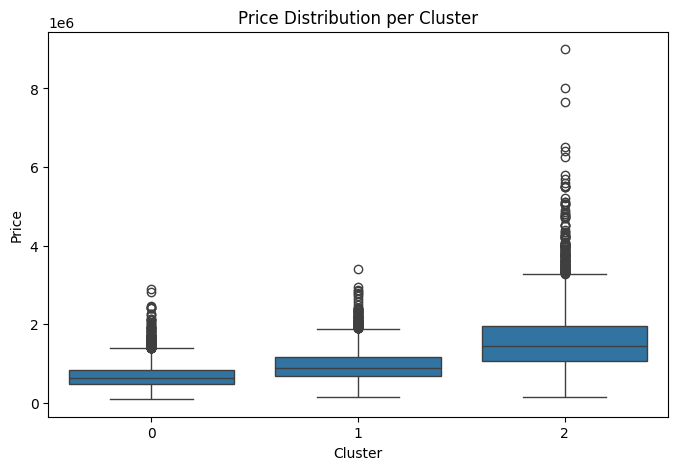

Cluster
1    5372
2    4162
0    4046
Name: count, dtype: int64


In [41]:
plt.figure(figsize=(8, 5))
sns.boxplot(x='Cluster', y='Price', data=df_analyzed)
plt.title("Price Distribution per Cluster")
plt.show()
print(df_analyzed['Cluster'].value_counts())


1. Does preprocessing affect the result of the model? Why?

Yes, preprocessing affects the result of the model a lot. If we don’t clean the data or handle missing values, the model may group things incorrectly or get confused. For example, if some house prices or land sizes are missing, it might treat them as 0 or just ignore them, which makes the clustering worse. Also, scaling the data makes sure that all the features are treated fairly, otherwise features with big numbers like price would overpower the others like rooms or bathrooms.

2. What is your conclusion based on the interpretation or result of your model?

Based on the result of my model, I was able to divide the houses into 3 main groups or clusters. One cluster had houses with higher prices and probably more rooms, meaning they were more expensive or bigger homes. Another cluster had houses with lower prices, fewer rooms, probably smaller land, maybe apartments or cheap homes. The last group was somewhere in the middle. So KMeans helped me understand how houses in the dataset could be grouped based on their features, even though we didn’t tell the model what prices were high or low ahead of time.